In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM

from tensorflow.keras.datasets import reuters # 데이터셋 가져오기

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt





In [2]:
# 테스트 20프로 train 80프로
(X_train, y_train), (X_test, y_test) = \
                    reuters.load_data(num_words=1000, test_split=0.2) # 상위 천개만 사용
# 빈도가 1~1,000에 해당하는 단어만 선택해서 불러오는 것입니다.


C:\Users\82108\anaconda3\envs\ts\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\82108\anaconda3\envs\ts\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
# 데이터 확인 후 출력
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 데이터 전처리
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(y_train) #원핫인코딩
y_test = to_categorical(y_test)

In [5]:
print(y_train[0]) 

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
model = Sequential()
model.add(Embedding(1000, 100))# 1000차원을 100으로 전환
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation ='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

input =100 <== embedding 레이어에서 100으로

output = 100 <== lstm 첫번쨰 인자

4 * ((100 + 1) * 100 + 100^2) = 80,400

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size=100, \
                   epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
90/90 [==============================] - 16s 176ms/step - loss: 2.5750 - accuracy: 0.3573 - val_loss: 2.2070 - val_accuracy: 0.4804
Epoch 2/20
90/90 [==============================] - 16s 176ms/step - loss: 2.0570 - accuracy: 0.4748 - val_loss: 1.9425 - val_accuracy: 0.4938
Epoch 3/20
90/90 [==============================] - 18s 198ms/step - loss: 1.8276 - accuracy: 0.5240 - val_loss: 1.8120 - val_accuracy: 0.5401
Epoch 4/20
90/90 [==============================] - 21s 235ms/step - loss: 1.7306 - accuracy: 0.5485 - val_loss: 1.7823 - val_accuracy: 0.5410
Epoch 5/20
90/90 [==============================] - 20s 219ms/step - loss: 1.7023 - accuracy: 0.5603 - val_loss: 1.7950 - val_accuracy: 0.5414
Epoch 6/20
90/90 [==============================] - 18s 200ms/step - loss: 1.6462 - accuracy: 0.5750 - val_loss: 1.6699 - val_accuracy: 0.5828
Epoch 7/20
90/90 [==============================] - 19s 213ms/step - loss: 1.5510 - accuracy: 0.6112 - val_loss: 1.6043 - val_accuracy: 0.5997

In [10]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 3s 44ms/step - loss: 1.1908 - accuracy: 0.7048

 Test Accuracy: 0.7048


In [11]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']

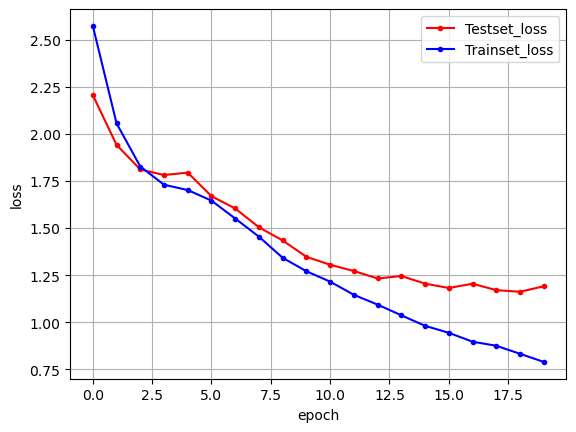

In [13]:
# 그래프로 표현
X_len = np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(X_len, y_loss, marker='.', c="blue", label='Trainset_loss')
  
# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()